## Descriptive Statistics

The data file bollywood.csv  contains box office collection
and social media promotion information about movies released in 2013−2015 period. Following are the
columns and their descriptions.

1.  SlNo – Release Date
2.  MovieName – Name of the movie
3.  ReleaseTime – Mentions special time of release. LW (Long weekend), FS (Festive Season), HS (Holiday Season), N (Normal)
4.  Genre – Genre of the film such as Romance, Thriller, Action, Comedy, etc.
5.  Budget – Movie creation budget
6.  BoxOfficeCollection – Box office collection
7.  YoutubeViews – Number of views of the YouTube trailers
8.  YoutubeLikes – Number of likes of the YouTube trailers
9.  YoutubeDislikes – Number of dislikes of the YouTube trailers

Answer the following questions

1. How many records are present in the dataset? Print the metadata information of the dataset.
2. How many movies got released in each genre? Which genre had highest number of releases? Sort
number of releases in each genre in descending order.
3. How many movies in each genre got released in different release times like long weekend, festive
season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.)
4. Which month of the year, maximum number movie releases are seen? (Note: Extract a new column
called month from ReleaseDate column.)
5. Which month of the year typically sees most releases of high budgeted movies, that is, movies with
budget of 25 crore or more?
6. Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on
investment (ROI) as (BoxOfficeCollection – Budget) / Budget.
7. Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate
the average ROI for different release times.
8. Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the
plot to conclude if the most movies are high or low budgeted movies.
9. Compare the distribution of ROIs between movies with comedy genre and drama. Which genre
typically sees higher ROIs?
10. Is there a correlation between box office collection and YouTube likes? Is the correlation positive or
negative?
11. Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies
to compare.
12. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes,
YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap.

### Loading data into dataframe

In [234]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # This overrides the default style of matplotlib


In [235]:
bollywood_df=pd.read_csv("data/bollywood.csv")

In [236]:
# Check the type

type(bollywood_df)


pandas.core.frame.DataFrame

### 1. How many records are present in the dataset? Print the metadata information of the dataset.

In [237]:
bollywood_df.shape

(149, 10)

Thus, there are 149 records present in the dataframe with 10 columns (features)

In [238]:
bollywood_df.describe()

,SlNo,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
count,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000
mean,75.000000,29.442953,55.667248,3.337920e+06,7877.536913,1207.818792
std,43.156691,28.237981,94.494531,3.504407e+06,12748.047191,1852.692938
min,1.000000,2.000000,0.010000,4.354000e+03,1.000000,1.000000
25%,38.000000,11.000000,8.780000,1.076591e+06,1377.000000,189.000000
50%,75.000000,21.000000,28.000000,2.375050e+06,4111.000000,614.000000
75%,112.000000,35.000000,57.450000,4.550051e+06,9100.000000,1419.000000
max,149.000000,150.000000,735.000000,2.317107e+07,101275.000000,11888.000000


describe() only prints the information for the numerical features. This makes sense since it would be irrelevant to find the mean/standard deviation for the categorical variable or date variable. Still, for some reason you need to include all these variable, describe() takes a paramter include='all' that would help you with this

In [239]:
bollywood_df.describe(include='all')

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
count,149.000000,149,149,149,149,149.000000,149.000000,1.490000e+02,149.000000,149.000000
unique,NaN,102,149,4,7,NaN,NaN,NaN,NaN,NaN
top,NaN,9-May-14,Chennai Express,N,Comedy,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,1,99,36,NaN,NaN,NaN,NaN,NaN
mean,75.000000,NaN,NaN,NaN,NaN,29.442953,55.667248,3.337920e+06,7877.536913,1207.818792
std,43.156691,NaN,NaN,NaN,NaN,28.237981,94.494531,3.504407e+06,12748.047191,1852.692938
min,1.000000,NaN,NaN,NaN,NaN,2.000000,0.010000,4.354000e+03,1.000000,1.000000
25%,38.000000,NaN,NaN,NaN,NaN,11.000000,8.780000,1.076591e+06,1377.000000,189.000000
50%,75.000000,NaN,NaN,NaN,NaN,21.000000,28.000000,2.375050e+06,4111.000000,614.000000
75%,112.000000,NaN,NaN,NaN,NaN,35.000000,57.450000,4.550051e+06,9100.000000,1419.000000


In [240]:
# Print metadata of the data
bollywood_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB



It looks like we have no missing values. All the features have 149 data points. It is interesting to note that non integer/ float values are represented by the type 'object'

In [241]:
# Print the first 5 records

bollywood_df.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [242]:
# Print the last 5 records

bollywood_df.tail()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
144,145,27-Feb-15,Dum Laga Ke Haisha,N,Comedy,15,30.00,3250917,8185,615
145,146,13-Mar-15,NH10,N,Thriller,13,32.10,5592977,15464,1513
146,147,20-Mar-15,Dilliwali Zaalim Girlfriend,N,Comedy,32,12.00,2316047,4289,807
147,148,20-Mar-15,Hunterrr,N,Comedy,5,11.89,4674795,3706,762
148,149,23-May-14,Kochadaiiyaan,HS,Action,150,120.00,4740727,13466,2649


### 2. How many movies got released in each genre? Which genre had highest number of releases? Sort number of releases in each genre in descending order.

In [243]:
bollywood_df[['MovieName','Genre']][0:5] 

,MovieName,Genre
0,2 States,Romance
1,Table No. 21,Thriller
2,Amit Sahni Ki List,Comedy
3,Rajdhani Express,Drama
4,Bobby Jasoos,Comedy


Now let's look at the number of movies in each Genre. Pandas has an inbuilt function value_counts() that gives us the count of the total number of movies in each Genre

In [244]:
bollywood_df['Genre'].value_counts()

Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre, dtype: int64

Comedy Genre has 36 movies, Drama with 35 movies and so on.

The aforementioned data gives us an absolute number. In case I want to deduce more information. For example, the number of movies released in Comedy is what percentage of the total movies, I would normalize the data and multiply by 100

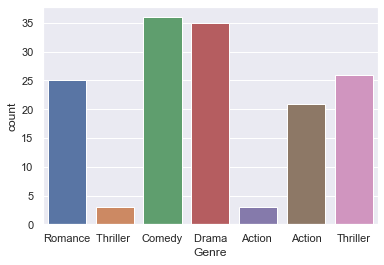

In [245]:
sns.countplot("Genre",data=bollywood_df)

In [246]:
bollywood_df['Genre'].value_counts(normalize=True)*100

Comedy       24.161074
 Drama       23.489933
Thriller     17.449664
Romance      16.778523
Action       14.093960
Thriller      2.013423
Action        2.013423
Name: Genre, dtype: float64

Thus, highest number of movies are released in Comedy Genre, followed by Drama. Action constitues the lowest percentage (Looks like this data is not from India :-p)

The data looks already sorted by descending order. In case you need to achieve it by ascending order, follow the following command

In [247]:
bollywood_df['Genre'].value_counts(ascending = True)

Action        3
Thriller      3
Action       21
Romance      25
Thriller     26
 Drama       35
Comedy       36
Name: Genre, dtype: int64

In case you want to sort it by descending order, set ascending =False

In [248]:
bollywood_df['Genre'].value_counts(ascending = False)

Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre, dtype: int64

### 3.How many movies in each genre got released in different release times like long weekend, festive season, etc. 

Hmmm, this looks slightly complex. Let's break it down. The data related to long weekend, festive season etc is present in the column ReleaseTime. So here, we are asked to do a cross tabulation between the columsn Genre and ReleaseTime

In [249]:
bollywood_df['ReleaseTime'].unique() # Displays the unique values in the REleaseTime column

array(['LW', 'N', 'HS', 'FS'], dtype=object)

In [250]:
# Cross Tabulation
pd.crosstab(bollywood_df['Genre'],bollywood_df['ReleaseTime'])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Drama,4,6,1,24
Action,3,3,3,12
Action,0,0,0,3
Comedy,3,5,5,23
Romance,3,3,4,15
Thriller,4,1,1,20
Thriller,0,0,1,2


### 4. Which month of the year, maximum number movie releases are seen? (Note: Extract a new column called month from ReleaseDate column.)

In [251]:
bollywood_df.columns

Index(['SlNo', 'Release Date', 'MovieName', 'ReleaseTime', 'Genre', 'Budget',
       'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes',
       'YoutubeDislikes'],
      dtype='object')

In [252]:
bollywood_df['Release Date']=pd.to_datetime(bollywood_df['Release Date'])

In [253]:
bollywood_df['Release Date']

0     2014-04-18
1     2013-01-04
2     2014-07-18
3     2013-01-04
4     2014-07-04
         ...    
144   2015-02-27
145   2015-03-13
146   2015-03-20
147   2015-03-20
148   2014-05-23
Name: Release Date, Length: 149, dtype: datetime64[ns]

In [254]:
bollywood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SlNo                 149 non-null    int64         
 1   Release Date         149 non-null    datetime64[ns]
 2   MovieName            149 non-null    object        
 3   ReleaseTime          149 non-null    object        
 4   Genre                149 non-null    object        
 5   Budget               149 non-null    int64         
 6   BoxOfficeCollection  149 non-null    float64       
 7   YoutubeViews         149 non-null    int64         
 8   YoutubeLikes         149 non-null    int64         
 9   YoutubeDislikes      149 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 11.8+ KB


In [255]:
bollywood_df['month']=bollywood_df['Release Date'].dt.month

In [256]:
bollywood_df['Month'] = bollywood_df['Release Date'].dt.strftime('%b')

In [257]:
bollywood_df.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,month,Month
0,1,2014-04-18,2 States,LW,Romance,36,104.00,8576361,26622,2527,4,Apr
1,2,2013-01-04,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,1,Jan
2,3,2014-07-18,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,7,Jul
3,4,2013-01-04,Rajdhani Express,N,Drama,7,0.35,42626,86,19,1,Jan
4,5,2014-07-04,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,7,Jul


In [258]:
bollywood_df['Month'].value_counts(ascending=False)

Jan    20
Mar    19
May    18
Feb    16
Jul    16
Apr    11
Sep    10
Nov    10
Jun    10
Oct     9
Aug     8
Dec     2
Name: Month, dtype: int64

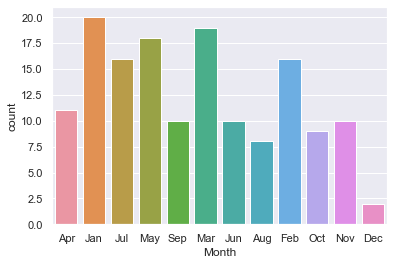

In [259]:
sns.countplot("Month",data=bollywood_df)

In [260]:
bollywood_df[bollywood_df['Month']=="Dec"]

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,month,Month
89,90,2014-12-19,PK,HS,Drama,85,735.00,13270623,43767,5693,12,Dec
91,92,2014-12-05,Action Jackson,N,Action,90,57.45,13279636,19240,3859,12,Dec


### 5. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?

In [261]:
bollywood_df[bollywood_df['Budget']>25]['Month'].value_counts()

Feb    9
Aug    7
Nov    6
Jul    6
Mar    6
Jan    6
Jun    5
Sep    4
Apr    4
Oct    4
May    3
Dec    2
Name: Month, dtype: int64

### 6. Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget.

In [262]:
bollywood_df['ROI']=bollywood_df['BoxOfficeCollection']-bollywood_df['Budget']
bollywood_df.head(5)

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,month,Month,ROI
0,1,2014-04-18,2 States,LW,Romance,36,104.00,8576361,26622,2527,4,Apr,68.00
1,2,2013-01-04,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,1,Jan,2.00
2,3,2014-07-18,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,7,Jul,-6.00
3,4,2013-01-04,Rajdhani Express,N,Drama,7,0.35,42626,86,19,1,Jan,-6.65
4,5,2014-07-04,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,7,Jul,-7.20


In [263]:
boll_df=bollywood_df[['MovieName','Genre','Budget','BoxOfficeCollection','Month','ROI']].sort_values(by='ROI',ascending=False)[0:10].reset_index(drop=True)
boll_df

,MovieName,Genre,Budget,BoxOfficeCollection,Month,ROI
0,PK,Drama,85,735.0,Dec,650.0
1,Chennai Express,Comedy,75,395.0,Aug,320.0
2,Kick,Action,100,377.0,Jul,277.0
3,Grand Masti,Comedy,35,298.0,Sep,263.0
4,Happy New Year,Drama,125,383.0,Oct,258.0
5,Yeh Jawaani Hai Deewani,Romance,70,311.0,May,241.0
6,Bang Bang,Action,140,340.0,Oct,200.0
7,Krrish 3,Action,115,300.0,Nov,185.0
8,Bhaag Milkha Bhaag,Drama,30,164.0,Jul,134.0
9,Humpty Sharma Ki Dulhania,Romance,20,130.0,Jul,110.0


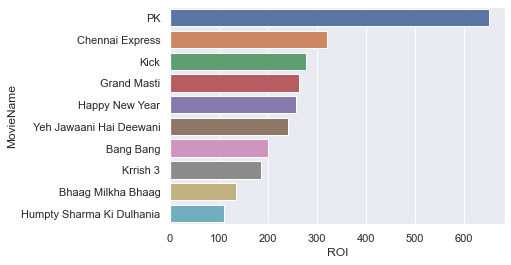

In [264]:
sns.barplot(y="MovieName",x="ROI",data=boll_df)

### 7. Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times.

In [265]:
bolly=bollywood_df.groupby('ReleaseTime')['ROI'].mean().sort_values(ascending=False).reset_index()
bolly

,ReleaseTime,ROI
0,LW,51.922000
1,FS,48.888235
2,HS,45.897222
3,N,14.862020


In [266]:
bolly_genre=bollywood_df.groupby('Genre')['ROI'].mean().sort_values(ascending=False).reset_index()
bolly_genre

,Genre,ROI
0,Drama,41.593143
1,Action,41.440000
2,Thriller,32.550000
3,Romance,27.681200
4,Comedy,20.837222
5,Thriller,3.019231
6,Action,-12.300000


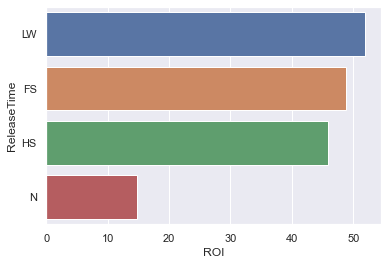

In [267]:
sns.barplot(x="ROI",y="ReleaseTime",data=bolly)

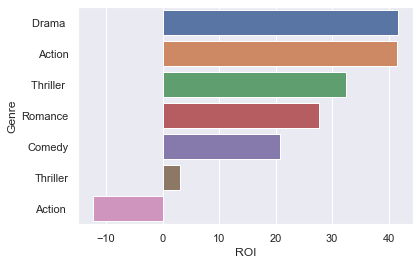

In [268]:
sns.barplot(x="ROI",y="Genre",data=bolly_genre)

### 8. Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the plot to conclude if the most movies are high or low budgeted movies.

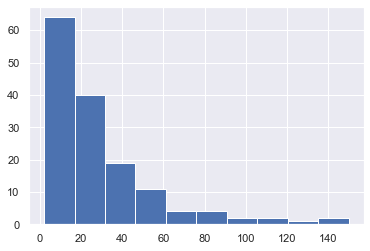

In [269]:
plt.hist(bollywood_df['Budget']);

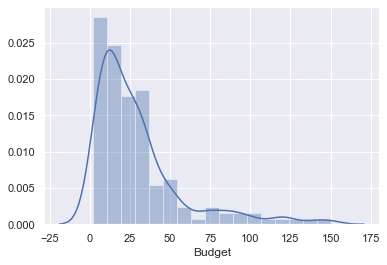

In [270]:
sns.distplot(bollywood_df['Budget']);

The histogram is right skewed. Most of the movies are produced with a budget of less than 30 cores. Thus low budget movies ar released more

### Box Plot

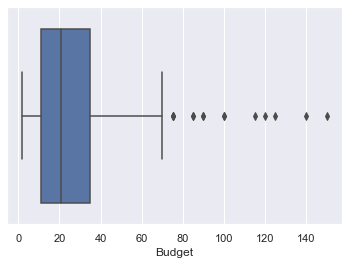

In [271]:
box = sns.boxplot(bollywood_df['Budget']);

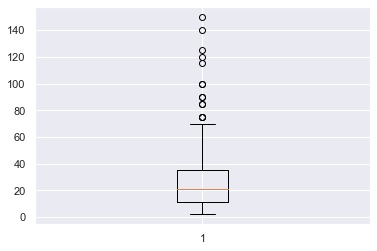

In [272]:
box=plt.boxplot(bollywood_df['Budget'].values)

In [273]:
bollywood_df['Budget'].describe()

count    149.000000
mean      29.442953
std       28.237981
min        2.000000
25%       11.000000
50%       21.000000
75%       35.000000
max      150.000000
Name: Budget, dtype: float64

In [274]:
[item.get_ydata()[0] for item in box['caps']]  # caps in the box variable returns the min and the max value

[2.0, 70.0]

In [275]:
[item.get_ydata()[0] for item in box['whiskers']]  # whiskers in the box variable returns the 1st quartile (25 percentile) and 3rd quartile (75 percentile) value

[11.0, 35.0]

In [276]:
[item.get_ydata()[0] for item in box['medians']] 

[21.0]

### Outliers

In [277]:
bollywood_df[bollywood_df['Budget']>71]

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,month,Month,ROI
26,27,2014-10-24,Happy New Year,LW,Drama,125,383.00,6395202,37585,10269,10,Oct,258.00
39,40,2014-06-20,Humshakals,HS,Comedy,75,63.70,6280868,1,1,6,Jun,-11.30
41,42,2014-01-24,Jai Ho,N,Action,120,111.00,868743,2783,404,1,Jan,-9.00
43,44,2014-07-25,Kick,N,Action,100,377.00,18986221,101275,10066,7,Jul,277.00
78,79,2014-08-15,Singham Returns,LW,Action,90,200.00,8287587,20011,2899,8,Aug,110.00
89,90,2014-12-19,PK,HS,Drama,85,735.00,13270623,43767,5693,12,Dec,650.00
91,92,2014-12-05,Action Jackson,N,Action,90,57.45,13279636,19240,3859,12,Dec,-32.55
92,93,2014-10-02,Bang Bang,FS,Action,140,340.00,15889811,61805,6283,10,Oct,200.00
96,97,2013-10-02,Besharam,LW,Comedy,85,35.00,5319606,10253,8165,10,Oct,-50.00
115,116,2013-08-09,Chennai Express,FS,Comedy,75,395.00,1882346,7954,1593,8,Aug,320.00


### 9. Compare the distribution of ROIs between movies with comedy genre and drama. Which genre typically sees higher ROIs?

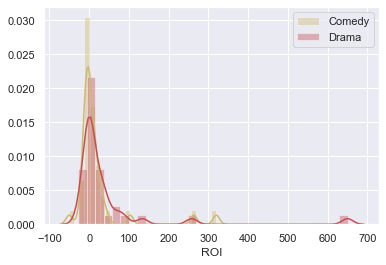

In [278]:
sns.distplot(bollywood_df[bollywood_df['Genre']=='Comedy']['ROI'],color='y',label="Comedy")
sns.distplot(bollywood_df[bollywood_df['Genre']==' Drama ']['ROI'],color='r',label="Drama")
plt.legend()

From the distribution plot above, it seems that Comedy genre gives higher ROI than Drama but not by a large number

### 10. Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?

In [279]:
bollywood_df[['BoxOfficeCollection','YoutubeLikes']].corr()

,BoxOfficeCollection,YoutubeLikes
BoxOfficeCollection,1.000000,0.682517
YoutubeLikes,0.682517,1.000000


There is positive correlation between BoxOffice Collection and Youtube Likes

### 11. Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.

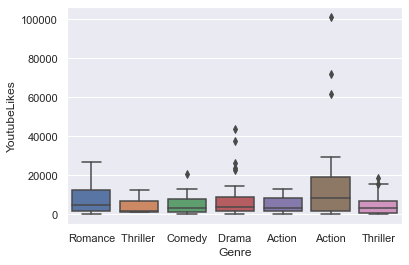

In [280]:
sns.boxplot(x="Genre",y="YoutubeLikes",data=bollywood_df)

Action movies receives more youtube likes

### 12. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes,YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap.

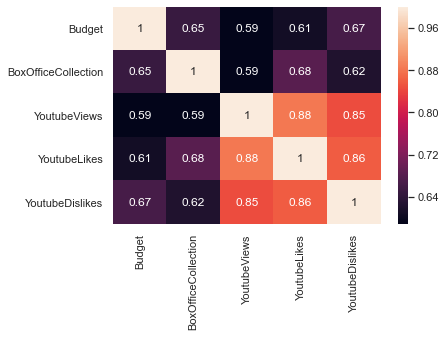

In [281]:
sns.heatmap(bollywood_df[['Budget','BoxOfficeCollection','YoutubeViews','YoutubeLikes','YoutubeDislikes']].corr(),annot=True)